In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("MLmetrics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’, ‘ROCR’




In [ ]:
library(MASS)
library(dplyr)
library(caret) 
library(pROC)
library(MLmetrics)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘MLmetrics’


The following objects are masked from ‘package:caret’:

    MAE, RMSE


The following object is masked from ‘package:base’:

    Recall




In [ ]:
test_model <- function(model, test){
    prob <- model %>% predict(test, type = "response")
    test$predicted <- ifelse(prob > 0.5, 1, 0)
    cat("Accuracy: ", mean(test$predicted == test$carga_aprobada),"\n")
    cat("F1 Score: ", F1_Score(y_pred = test$predicted, y_true = test$carga_aprobada, positive = "1"),"\n")
    plot.roc(roc(test$carga_aprobada, prob), print.auc=T, print.thres = "best", col="blue")
    
    confusionMatrix(table(test$predicted, test$carga_aprobada), positive = '1')
  
}

In [ ]:
train <- read.csv("train_norm.csv")

nrow(train)
length(names(train))

[1] 906

[1] 17

In [ ]:
test <- read.csv("test_norm.csv")

nrow(test)
length(names(test))

[1] 389

[1] 17

In [ ]:
prop.table(table(train$carga_aprobada)) 
prop.table(table(test$carga_aprobada))


        0         1 
0.5540839 0.4459161 


        0         1 
0.6169666 0.3830334 

MODELO INICIAL

In [ ]:
gpaModel <- glm(carga_aprobada ~ ., data = train, family = "binomial")
summary(gpaModel) # AIC: 19683


Call:
glm(formula = carga_aprobada ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2873  -0.7902  -0.4343   0.8209   2.4440  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.9980     0.8344  -2.394 0.016645 *  
tasa_rep_carga       -2.7594     0.7507  -3.676 0.000237 ***
quintil_asig         -0.9676     0.4638  -2.086 0.036950 *  
ceneval_analitico     0.6955     0.6327   1.099 0.271674    
ceneval_matematico    1.8133     0.5480   3.309 0.000937 ***
ceneval_lengua        0.4193     0.5923   0.708 0.478961    
ceneval_esp           0.2609     0.5793   0.450 0.652402    
prom_per_prev         3.8484     0.8784   4.381 1.18e-05 ***
tasa_rep_doc         -0.6878     0.4803  -1.432 0.152086    
tasa_aprob_per_prev   0.4010     0.2911   1.377 0.168395    
año_encurso          -0.8467     0.5646  -1.500 0.133696    
complejidad_carga5   -1.0026     0.2826  -3.548 0.000389 ***
to

Accuracy:  0.7737789 
F1 Score:  0.7086093 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

   
      0   1
  0 194  42
  1  46 107
                                          
               Accuracy : 0.7738          
                 95% CI : (0.7289, 0.8144)
    No Information Rate : 0.617           
    P-Value [Acc > NIR] : 2.988e-11       
                                          
                  Kappa : 0.5238          
                                          
 Mcnemar's Test P-Value : 0.7491          
                                          
            Sensitivity : 0.7181          
            Specificity : 0.8083          
         Pos Pred Value : 0.6993          
         Neg Pred Value : 0.8220          
             Prevalence : 0.3830          
         Detection Rate : 0.2751          
   Detection Prevalence : 0.3933          
      Balanced Accuracy : 0.7632          
                                          
       'Positive' Class : 1               
                                          

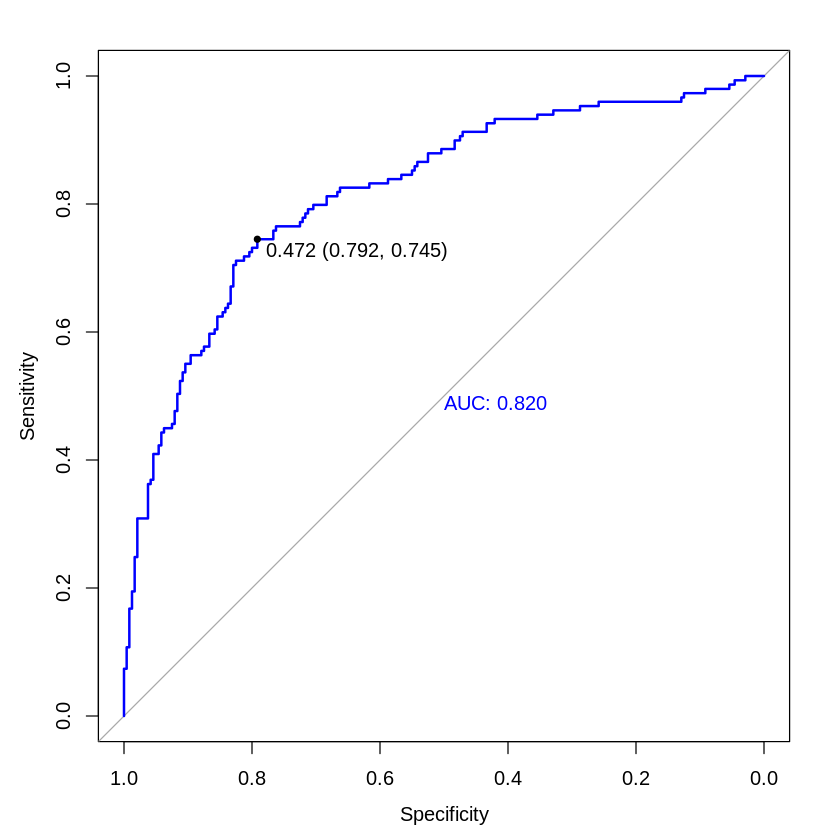

In [ ]:
test_model(gpaModel, test)

stepAIC

Para obtener el mejor modelo de Regresión Logística se emplea la función stepAIC.

In [ ]:
mod_both <- stepAIC(gpaModel, direction = "both")
summary(mod_both) #AIC: 13344

Start:  AIC=962.9
carga_aprobada ~ tasa_rep_carga + quintil_asig + ceneval_analitico + 
    ceneval_matematico + ceneval_lengua + ceneval_esp + prom_per_prev + 
    tasa_rep_doc + tasa_aprob_per_prev + año_encurso + complejidad_carga5 + 
    total_recursando + recursada + asigMuchas + semestre_Otoño + 
    situacion_Irregular

                      Df Deviance    AIC
- ceneval_esp          1   929.10 961.10
- ceneval_lengua       1   929.40 961.40
- total_recursando     1   929.77 961.77
- ceneval_analitico    1   930.11 962.11
- tasa_aprob_per_prev  1   930.79 962.79
<none>                     928.90 962.90
- tasa_rep_doc         1   930.96 962.96
- año_encurso          1   931.15 963.15
- quintil_asig         1   933.33 965.33
- recursada            1   933.97 965.97
- semestre_Otoño       1   935.70 967.70
- ceneval_matematico   1   940.12 972.12
- complejidad_carga5   1   941.66 973.66
- tasa_rep_carga       1   942.86 974.86
- asigMuchas           1   945.13 977.13
- situacion_Irr


Call:
glm(formula = carga_aprobada ~ tasa_rep_carga + quintil_asig + 
    ceneval_analitico + ceneval_matematico + prom_per_prev + 
    tasa_rep_doc + complejidad_carga5 + recursada + asigMuchas + 
    semestre_Otoño + situacion_Irregular, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3595  -0.7991  -0.4339   0.8240   2.4646  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -2.4432     0.7279  -3.357 0.000789 ***
tasa_rep_carga       -2.6379     0.6438  -4.098 4.17e-05 ***
quintil_asig         -0.8831     0.4561  -1.937 0.052806 .  
ceneval_analitico     1.0718     0.5522   1.941 0.052234 .  
ceneval_matematico    1.9545     0.5220   3.744 0.000181 ***
prom_per_prev         4.3481     0.7537   5.769 7.96e-09 ***
tasa_rep_doc         -0.6855     0.4779  -1.434 0.151475    
complejidad_carga5   -0.9705     0.2759  -3.517 0.000436 ***
recursada             0.5161     0.2763  

Accuracy:  0.7866324 
F1 Score:  0.7205387 


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Confusion Matrix and Statistics

   
      0   1
  0 199  42
  1  41 107
                                          
               Accuracy : 0.7866          
                 95% CI : (0.7425, 0.8263)
    No Information Rate : 0.617           
    P-Value [Acc > NIR] : 5.526e-13       
                                          
                  Kappa : 0.548           
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7181          
            Specificity : 0.8292          
         Pos Pred Value : 0.7230          
         Neg Pred Value : 0.8257          
             Prevalence : 0.3830          
         Detection Rate : 0.2751          
   Detection Prevalence : 0.3805          
      Balanced Accuracy : 0.7736          
                                          
       'Positive' Class : 1               
                                          

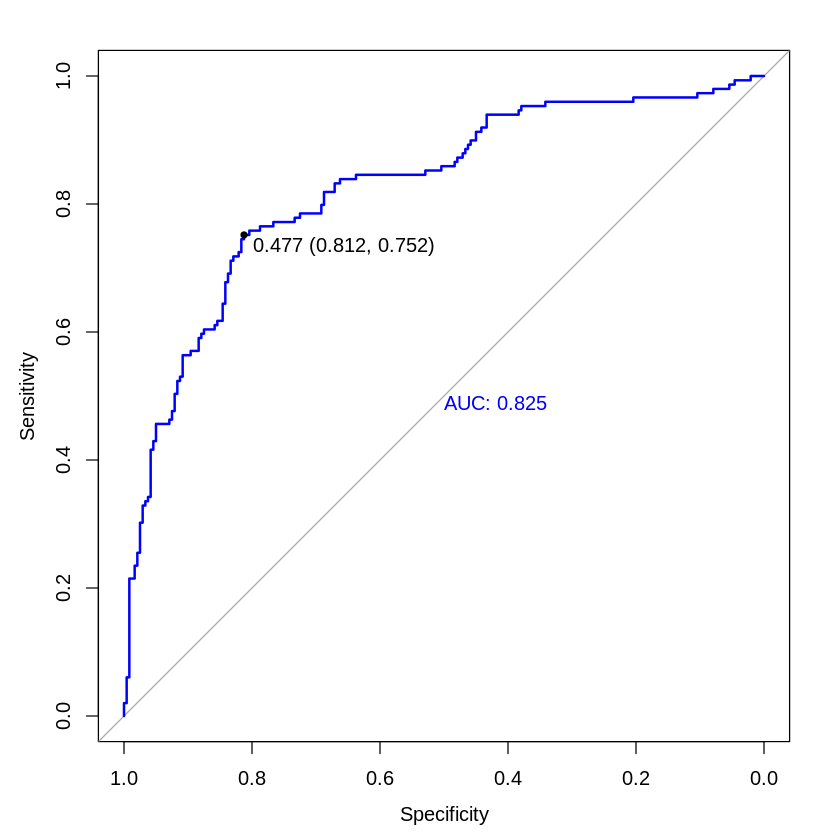

In [ ]:
test_model(mod_both, test)